# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')


import tensorflow as tf
import tensorflow_hub as hub

!pip3 install --upgrade tensorflow-gpu >> /dev/null
# Install TF-Hub.
!pip3 install tensorflow-hub >> /dev/null

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
data = pd.read_csv("/content/drive/MyDrive/Almabetter learning/Book Recommendation/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [64]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [65]:
netflix_titles_df=data.copy()

In [66]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added','rating'],inplace=True)

In [67]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [68]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [69]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

In [70]:
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [71]:
# test_df=netflix_shows_df.copy()
# test_df.rename(columns={'duration':'seasons'}, inplace=True)

In [72]:
# test_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
# test_df.head()

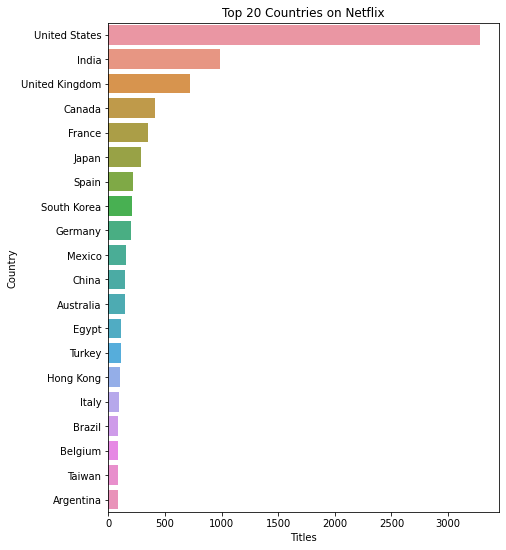

In [73]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [74]:
data=pd.concat([netflix_movies_df,netflix_shows_df])

In [75]:
data.isna().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration        2398
listed_in          0
description        0
seasons         5372
dtype: int64

In [76]:
data['seasons'].fillna(0,inplace=True)
data['duration'].fillna(999,inplace=True)

In [77]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [78]:
data['description']

1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
6       After an awful accident, a couple admitted to ...
                              ...                        
7767    Strong-willed, middle-class Kashaf and carefre...
7775    A quest for freedom and legendary treasure beg...
7777    While living alone in a spooky town, a young g...
7779    An assortment of talent takes the stage for a ...
7785    Dessert wizard Adriano Zumbo looks for the nex...
Name: description, Length: 7770, dtype: object

In [79]:
# #Ignoring stopwords (words with no semantics) from English and Portuguese (as we have a corpus with mixed languages)

# stopwords_list = stopwords.words('english')

# #Trains a model whose vectors size is 5000, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
# vectorizer = TfidfVectorizer(analyzer='word',
#                      ngram_range=(3,6),
#                      max_features=2000,
#                      min_df=0.001,
#                      max_df=0.95,
#                      stop_words=stopwords_list)

# #item_ids = user_book_ratng_mtx['ISBN'].tolist()
# tfidf_matrix = vectorizer.fit_transform(data['description'])
# tfidf_feature_names = vectorizer.get_feature_names()
# tfidf_matrix


# # min_df=0.003,
# # max_df=0.8,

In [80]:
# tfidf_feature_names

In [81]:
# sdf=pd.SparseDataFrame(tfidf_matrix,
#                          columns=tfidf_feature_names 
#                        #  ,default_fill_value=0
#                        )


# df_vect=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix,columns=tfidf_feature_names)

In [82]:
# df_vect.head()

In [83]:
data=data.reset_index(drop=True)

In [84]:
data.drop(['show_id'],inplace=True,axis=1)

In [85]:
# df_merged=pd.merge(data,df_vect,left_index=True, right_index=True)

In [86]:
data['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy                           1
Comedies, Cult Movies, Sports Movies                                                 1
TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers                                         1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [87]:
data['country'].value_counts()

United States                                      2546
India                                               923
Country Unavailable                                 505
United Kingdom                                      396
Japan                                               224
                                                   ... 
United States, Australia, Samoa, United Kingdom       1
China, Spain, South Korea, United States              1
United States, Greece, Brazil                         1
United States, Philippines                            1
United States, France, South Korea, Indonesia         1
Name: country, Length: 682, dtype: int64

In [88]:
data['director'].value_counts()

No Director               2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Sudip Bandyopadhyay          1
Pailin Wedel                 1
Brodje Wemboendja            1
Alexandre Aja                1
Lee Toland Krieger           1
Name: director, Length: 4048, dtype: int64

In [89]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from time import time
import keras.backend as K

from tensorflow.keras.layers import Layer, InputSpec
from keras.layers import Dense, Input, Embedding
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

x = data[['type','director','country','release_year','rating']]


from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels 
for column in x:
  x[column]= label_encoder.fit_transform(x[column])
 
x.head()
### we do not know which Ratings are good, i think director is irrelevant for our clustering as it would create unnecessary unique values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,type,director,country,release_year,rating
0,0,1839,309,67,8
1,0,1288,380,62,5
2,0,3444,550,60,4
3,0,3175,550,59,4
4,0,3988,138,70,8


In [90]:
# x_merged=pd.merge(x,df_vect,left_index=True, right_index=True)

In [91]:


# # scale the data for better results
# x_scaled = preprocessing.scale(x_merged)

In [92]:


# X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)

In [93]:
# from matplotlib import rcParams
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set()

# rcParams['figure.figsize'] = 20,8
# sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])

In [94]:
# data_tsne = pd.DataFrame({'d1': X_tsne[:, 0], 'd2': X_tsne[:, 1]})

In [95]:
# from sklearn.cluster import KMeans
# wcss = []

# for i in range(1,11):
#     kmeans = KMeans(i)
#     kmeans.fit(x_scaled)
#     wcss.append(kmeans.inertia_)
    
# sns.lineplot(range(1,11), wcss)
# plt.xlabel('No of labels')
# plt.ylabel('WCSS')



In [96]:
# kmeans_model = KMeans(3)
# kmeans_model.fit(x_scaled)
# data_tsne['kmeans']=kmeans_model.fit_predict(x_scaled)

In [97]:
# rcParams['figure.figsize'] = 18,8
# sns.scatterplot(data=data_tsne, x='d1', y='d2', hue='kmeans', palette='viridis')

In [98]:
# # scale the data for better results
# x_scaled_vect = preprocessing.scale(df_vect,with_mean=False)

# X_tsne_vect = TSNE(learning_rate=100).fit_transform(x_scaled_vect)


# sns.set()

# rcParams['figure.figsize'] = 20,8
# sns.scatterplot(X_tsne_vect[:, 0], X_tsne_vect[:, 1])

In [99]:

# data_tsne_vect = pd.DataFrame({'d1': X_tsne_vect[:, 0], 'd2': X_tsne_vect[:, 1]})

# wcss = []

# for i in range(1,11):
#     kmeans = KMeans(i)
#     kmeans.fit(x_scaled_vect)
#     wcss.append(kmeans.inertia_)
    
# sns.lineplot(range(1,11), wcss)
# plt.xlabel('No of labels')
# plt.ylabel('WCSS')

In [100]:
############## Preprocessing
data_new=data.copy()

In [101]:
#https://www.analyticsvidhya.com/blog/2022/01/from-word-embedding-to-documents-embedding-without-any-training/
import re
import string
import numpy as np
import math
from numpy import array 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from sklearn.cluster import KMeans
from collections import Counter 
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#-------------------------------------------------------------------------------
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
#-------------------------------------------------------------------------------


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
def preprocess_text(text):
    #text = re.sub(r'd+' , '', text)
    text = remove_punctuation(text)
    text = text.lower()
    text = text.strip()
    #text = re.sub(r'bw{1,2}b', '', text)
    tokens = toknizing(text)
    #pos_map = {'J': 'a', 'N': 'n', 'R': 'r', 'V': 'v'}
    pos_tags = pos_tag(tokens)
    lemmatiser = WordNetLemmatizer()
    #tokens = [lemmatiser.lemmatize(t.lower(), pos=pos_map.get(p[0], 'v')) for t, p in pos_tags]
    tokens = [lemmatiser.lemmatize(t.lower()) for t, p in pos_tags]
    return tokens

#--------------------------------------------------------------------------------------------
def remove_punctuation(text):
     punctuations = '''!()-[]{};:'",./?@#$%^+&*_~'''
     no_punct = ""
     for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
     return no_punct
#--------------------------------------------------------------------------------------------
def toknizing(text):
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text)
  result = [i for i in tokens if not i in stop_words]
  return result    

In [103]:
data_new['description'] = data_new['description'].apply(lambda x: ' '.join(preprocess_text(x)))
data_new['listed_in'] = data_new['listed_in'].apply(lambda x: ' '.join(preprocess_text(x)))
data_new.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
0,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93.0,drama international movie,devastating earthquake hit mexico city trapped...,0.0
1,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78.0,horror movie international movie,army recruit found dead fellow soldier forced ...,0.0
2,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80.0,action adventure independent movie scifi fantasy,postapocalyptic world ragdoll robot hide fear ...,0.0
3,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123.0,drama,brilliant group student become cardcounting ex...,0.0
4,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95.0,horror movie international movie,awful accident couple admitted grisly hospital...,0.0


In [104]:
# #Ignoring stopwords (words with no semantics) from English

# stopwords_list = stopwords.words('english')

# #Trains a model whose vectors size is 5000, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
# vectorizer_new_desc = TfidfVectorizer(analyzer='word',
#                      ngram_range=(3,7),
#                      max_features=5000,
#                      min_df=0.001,
#                      max_df=0.95,
#                      stop_words=stopwords_list)


# tfidf_matrix_descrition = vectorizer_new_desc.fit_transform(data_new['description'])
# tfidf_feature_names = vectorizer_new_desc.get_feature_names()


# df_vect_new=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix_descrition,columns=tfidf_feature_names)
# tfidf_feature_names





In [105]:


# vectorizer_new_list = TfidfVectorizer(analyzer='word',
#                      ngram_range=(2,4),
#                      max_features=2000,
#                      min_df=0.1,
#                      max_df=0.8,
#                      stop_words=stopwords_list)
# tfidf_matrix_listed = vectorizer_new_list.fit_transform(data_new['listed_in'])
# tfidf_feature_names_listed = vectorizer_new_list.get_feature_names()


# df_vect_new=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix_listed,columns=tfidf_feature_names_listed)
# tfidf_feature_names_listed

In [106]:
############################################# Universal sentence encoder

In [107]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [108]:
sentence_embeddings = model(data['description'])


In [109]:
description_embeddings=pd.DataFrame(sentence_embeddings.numpy())

In [110]:
description_embeddings.shape

(7770, 512)

In [112]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [114]:
## Find sim between aa sentence and sent in df
query = "army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret"
query_vec = model([query])[0]

list_sim=[]
for sent in data['description']:
  sim = cosine(query_vec, model([sent])[0])
  #print("Sentence = ", sent, "; similarity = ", sim)
  list_sim.append([sent,sim])

In [115]:
sim_df=pd.DataFrame(list_sim,columns=['sentence','sim'])

In [116]:
sim_df.sort_values(by=['sim','sentence'],axis=0,inplace=True,ascending=[False,True])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

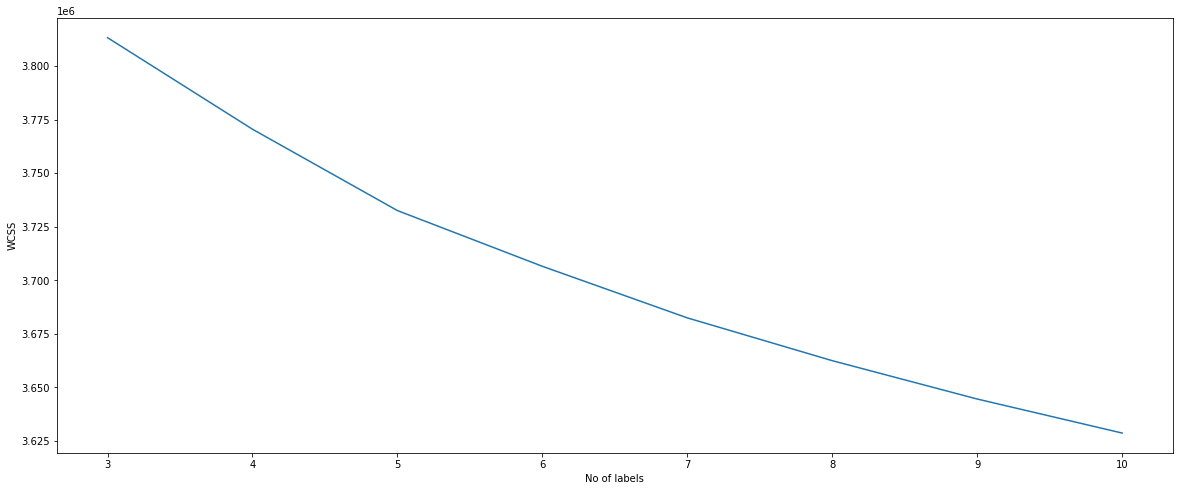

In [117]:
x_scaled_emb = preprocessing.scale(description_embeddings)

rcParams['figure.figsize'] = 20,8

wcss2 = []

for i in range(3,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_scaled_emb)
    wcss2.append(kmeans.inertia_)
    
sns.lineplot(range(3,11), wcss2);
plt.xlabel('No of labels')
plt.ylabel('WCSS')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


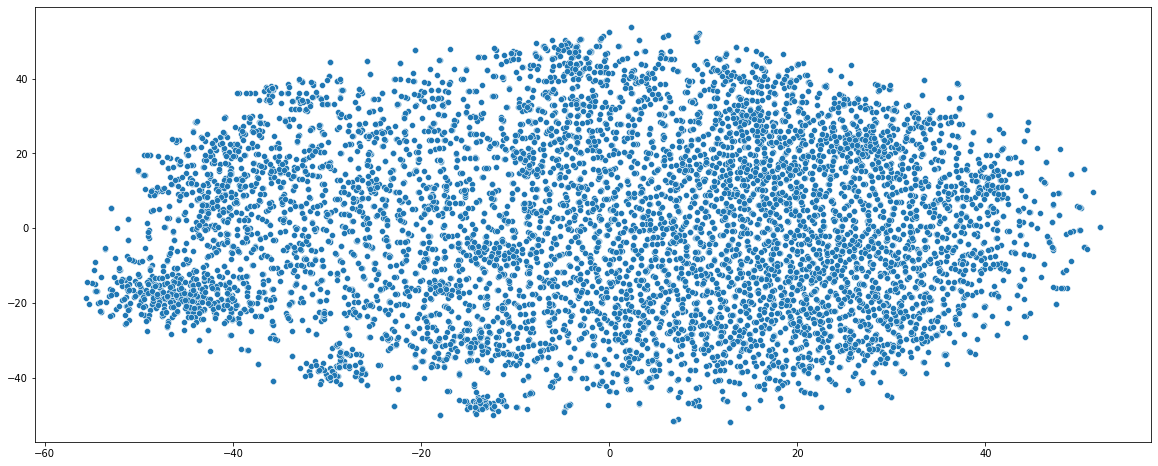

In [118]:
X_tsne_emb = TSNE(learning_rate=50).fit_transform(x_scaled_emb)

rcParams['figure.figsize'] = 20,8
sns.scatterplot(X_tsne_emb[:, 0], X_tsne_emb[:, 1])

In [119]:
data_tsne = pd.DataFrame({'d1': X_tsne_emb[:, 0], 'd2': X_tsne_emb[:, 1]})

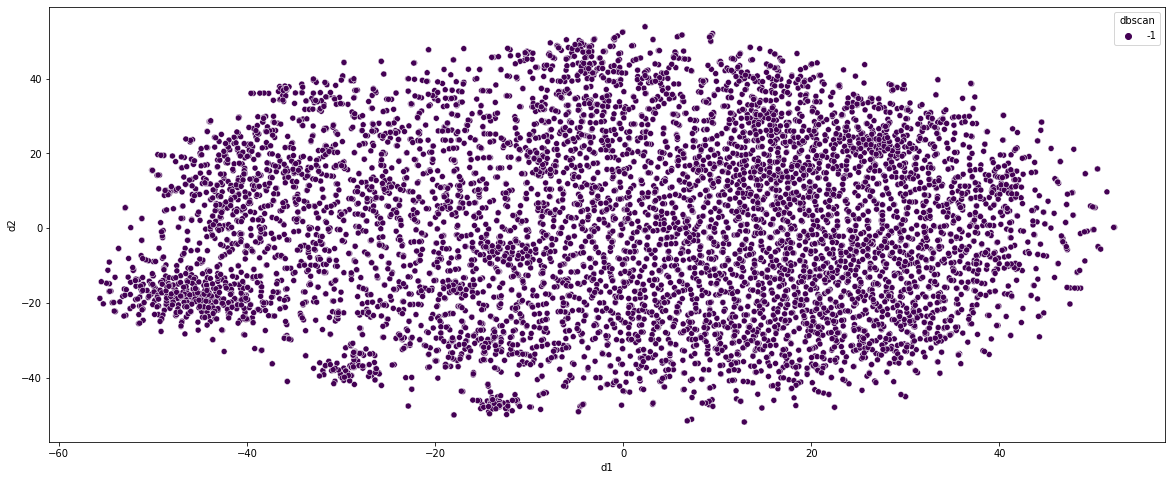

In [121]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps=0.30, min_samples=5)
data_tsne['dbscan'] = model_dbscan.fit_predict(x_scaled_emb)
sns.scatterplot(data=data_tsne, x='d1', y='d2', hue='dbscan', palette='viridis')

In [ ]:
data['listed_in'].value_counts()

In [ ]:
list_listed=[]
for i in data['listed_in']:
  temp=i.split(',')
  [list_listed.append(j.strip()) for j in temp]


In [ ]:
unq_list_listed=list(set(list_listed))

In [ ]:
#unq_list_listed

In [ ]:
#data.groupby(["title", "director", "listed_in",]).apply(lambda df: df.title)

In [130]:
df_test=data['listed_in']+' '+data['description']

In [131]:
df_test.head()

0    Dramas, International Movies After a devastati...
1    Horror Movies, International Movies When an ar...
2    Action & Adventure, Independent Movies, Sci-Fi...
3    Dramas A brilliant group of students become ca...
4    Horror Movies, International Movies After an a...
dtype: object

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WCSS')

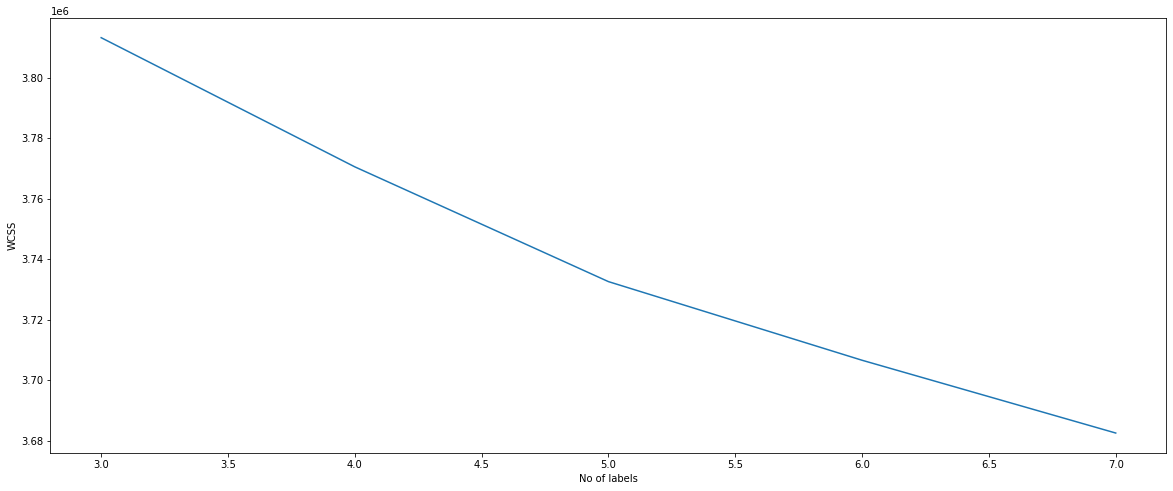

In [132]:
cast_embeddings = model(df_test)
df_cast_embeddings=pd.DataFrame(sentence_embeddings.numpy())


scaled_cast_emb = preprocessing.scale(df_cast_embeddings)

rcParams['figure.figsize'] = 20,8

wcss2 = []

for i in range(3,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_cast_emb)
    wcss2.append(kmeans.inertia_)
    
sns.lineplot(range(3,8), wcss2);
plt.xlabel('No of labels')
plt.ylabel('WCSS')

In [134]:
from sklearn.decomposition import PCA

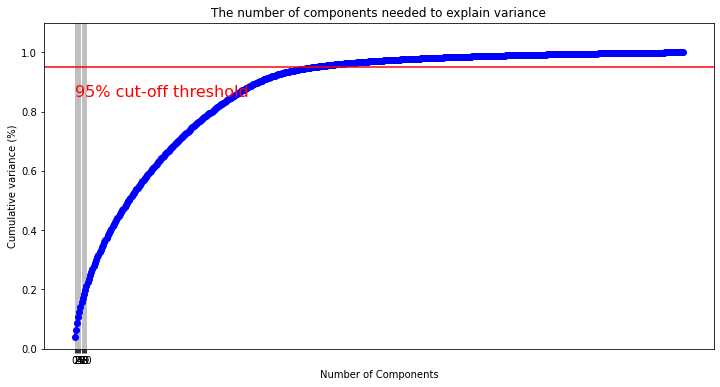

In [137]:
pca = PCA().fit(scaled_cast_emb)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 512, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()